# Задача предыдущая (3)

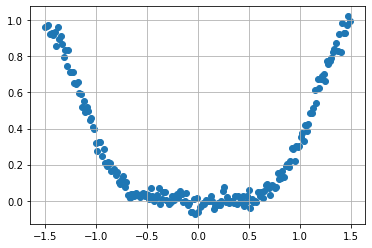

In [62]:

import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

x=np.arange(-1.5, 1.5, 0.015)
y=np.sin(x)**6+np.random.normal(0, 0.03, len(x))

DEG=5
poly=PolynomialFeatures(DEG)
X=poly.fit_transform(x.reshape(-1, 1))

plt.scatter(x, y)
plt.grid(True)
plt.show()

In [36]:
n_splits=3
N=10000

In [37]:
def iterate(X, y, w, alpha=alpha, mu=mu):
    grad=2*(X @ w - y) @ X + mu * np.sign(w)
    return w-alpha*grad

In [38]:
def learn(X, y, w, N=N):
    for i in range(N):
        w=iterate(X, y, w)
    return w

In [39]:
def loss_func(X, w, y):
    return np.sum((X @ w - y)**2)

In [65]:
kf=KFold(n_splits, shuffle=True)

loss_min=float(1e+10)
mu_min, alpha_min=(0, 0)
w_min=0

for alpha in np.linspace(1e-7, 3e-5, 15):
    for mu in np.linspace(-1, 1, 20):
        for train, test in kf.split(X):
                    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
                    w=np.random.normal(0, 0.1, X.shape[1])
                    w=learn(X_train, y_train, w)
                    if loss_min>loss_func(X_test, w, y_test):
                        loss_min=loss_func(X_test, w, y_test)
                        mu_min, alpha_min=mu, alpha
                        w_min=w
  
print("Оптимальные параметры:\n"+"mu={:.2f}, alpha={:2e}".format(mu_min, alpha_min)
           +"\n"+"Из диапозона mu[-1, 1], alpha[1e-7, 3e-5]"+"\n"+"Оптимальные веса:"+str(w_min))


Оптимальные параметры:
mu=1.00, alpha=1.505000e-05
Из диапозона mu[-1, 1], alpha[1e-7, 3e-5]
Оптимальные веса:[-1.12546417e-02 -7.42658700e-06  2.01836070e-01  1.71261517e-05
  1.38523988e-01  2.93454467e-04]


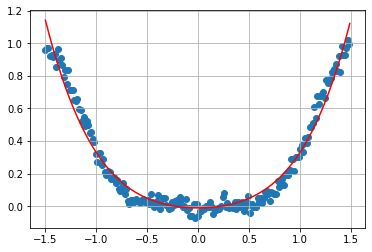

In [69]:
t=np.arange(-1.5, 1.5, 0.01)
z=poly.fit_transform(t.reshape(-1, 1))
z=z @ w_min.reshape(-1, 1)
plt.plot(t, z, c='r')
plt.scatter(x, y)
plt.grid(True)
plt.show()

# Задача следующая (4)

In [2]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

In [11]:
data, target = datasets.load_diabetes(return_X_y=True, as_frame=True)

coefs=np.linspace(0.5, 3, 10)
for coef in coefs:
    clf = linear_model.Lasso(alpha=coef, fit_intercept=True)
    clf.fit(data, target)
    ws = clf.coef_
    print(ws)


[  0.          -0.         471.03873321 136.50710814  -0.
  -0.         -58.3195488    0.         408.02332435   0.        ]
[  0.          -0.         420.01348311  63.17782765   0.
   0.          -0.           0.         360.1092031    0.        ]
[  0.          -0.         352.44892882   0.           0.
   0.          -0.           0.         292.3350296    0.        ]
[  0.           0.         267.55915473   0.           0.
   0.          -0.           0.         207.43155868   0.        ]
[  0.           0.         182.65755297   0.           0.
   0.          -0.           0.         122.53336478   0.        ]
[ 0.          0.         97.75595122  0.          0.          0.
 -0.          0.         37.63517087  0.        ]
[ 0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
